In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv


In [2]:
df = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [5]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
df.duplicated().sum()

24206

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(229474, 22)

In [9]:
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

Since all int variables refer to categories, there's no need to do any type conversion.

Note: Since all variables are encoded, it is highly advisable to read the data card in order to fully understand what's going on in this notebook. 

I can convert them, but it will be a time-consuming process since there are 22 columns.

The data card can be viewed on this url:

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-datasethttps://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

# Type-Based Separation of Features (Binary & Non-Binary)

In [10]:
binary = list(df.loc[:, df.nunique() == 2].columns)
nbinary = list(df.loc[:, df.nunique() != 2].columns)

#  **Exploratory Data Analysis**

**Univariate Analysis**

> **Binary Variables**

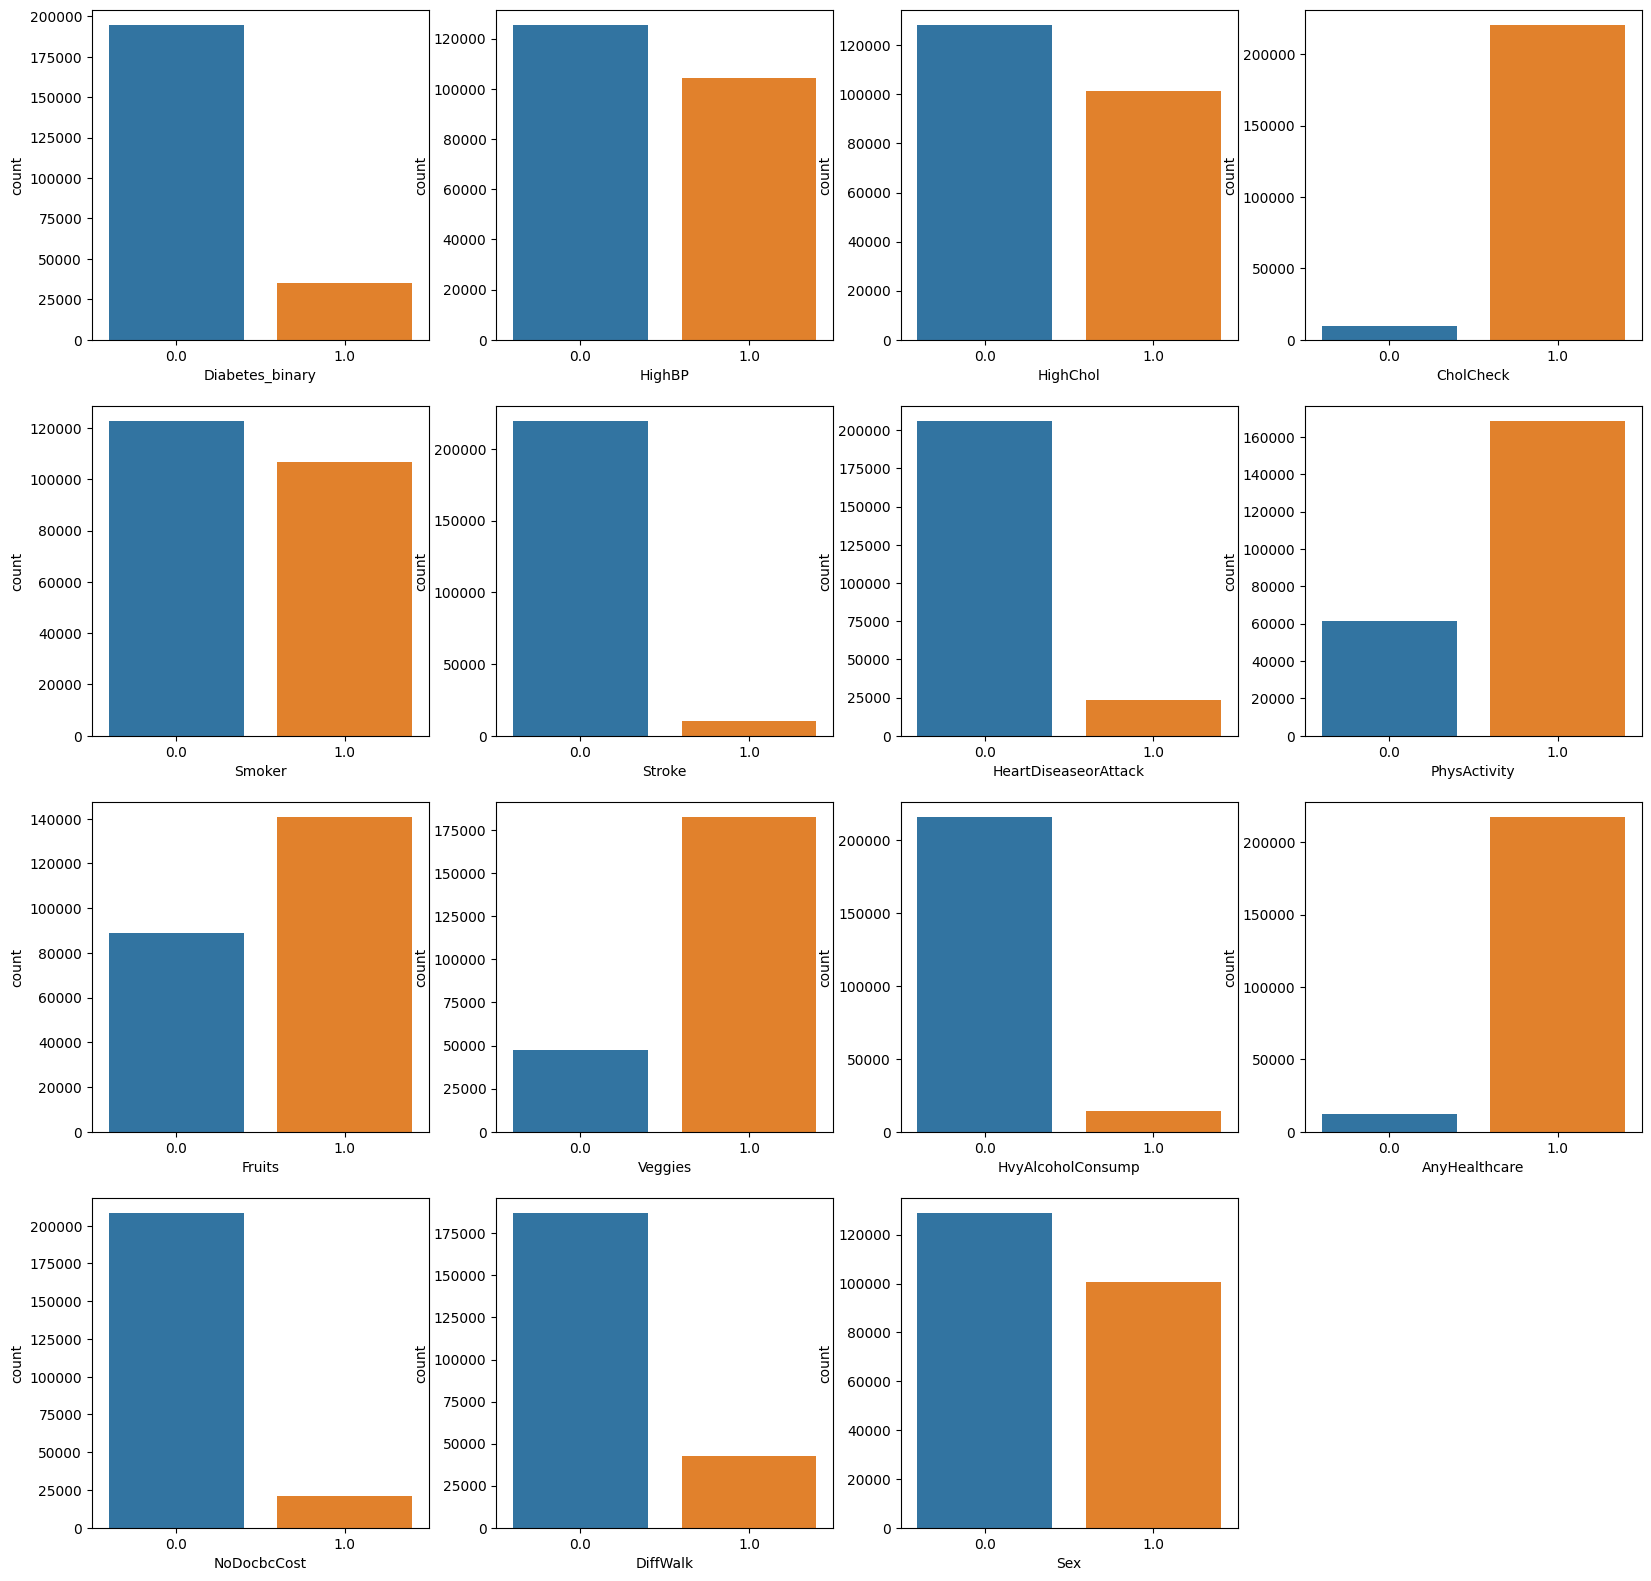

In [11]:
plt.figure(figsize=(20, 30))

for i in enumerate(binary):
    plt.subplot(6,4,i[0]+1)
    sns.countplot(x=i[1], data=df)

By observing the graphs we can see that most of the people that were surveyed were healthy and without diabetes

> **Other Categorical Variables**

Since the variables BMI, PhysHlth, MentHlth have unique values > 30,  we're gonna visualize the other variables

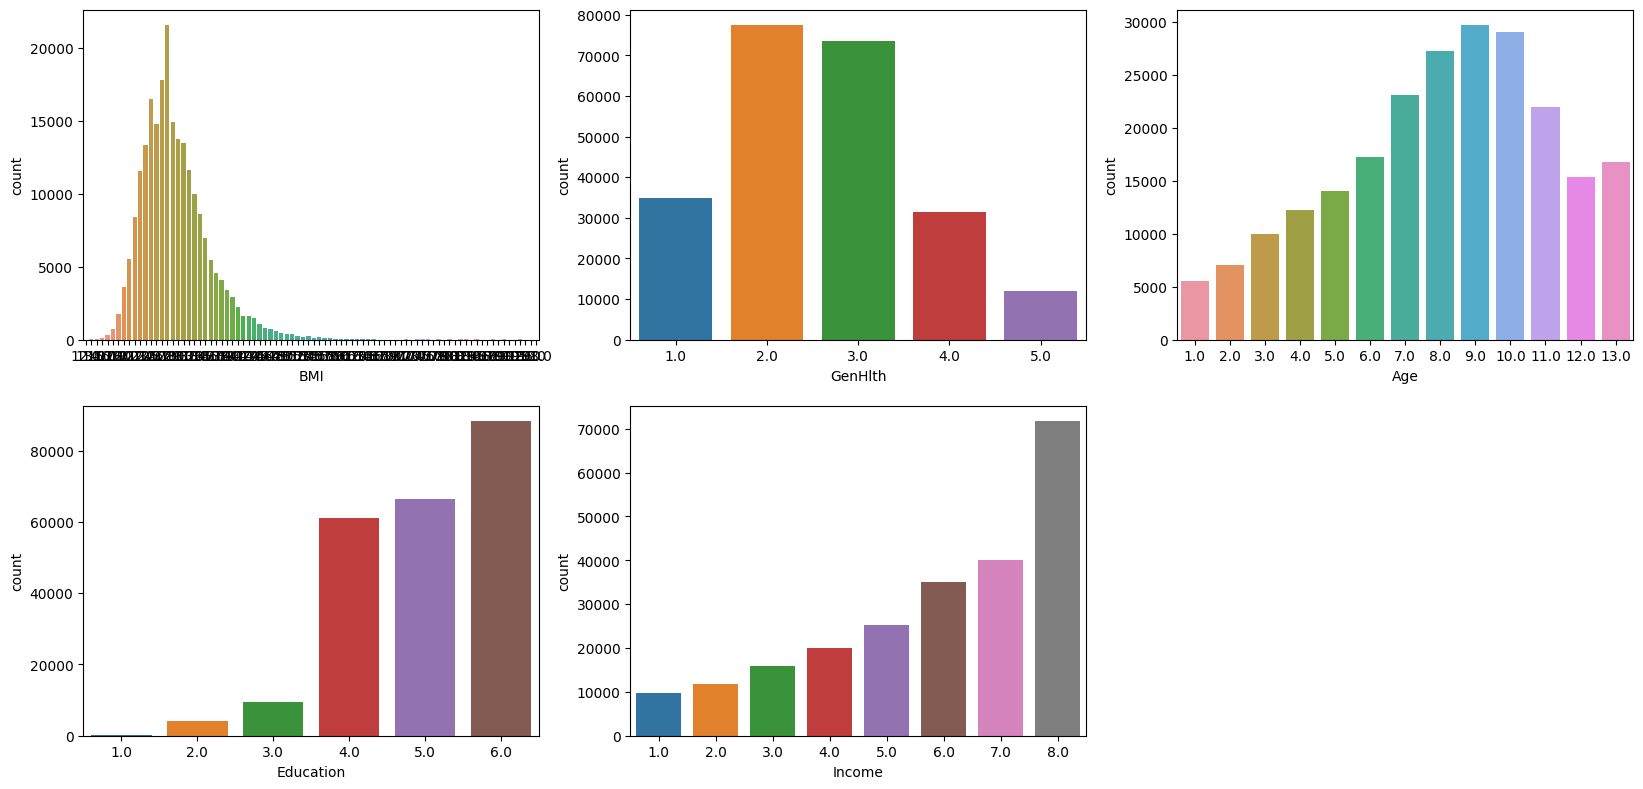

In [12]:
gr_nbinary =['BMI', 'GenHlth' , 'Age', 'Education', 'Income']

plt.figure(figsize=(20,30))

for i in enumerate(gr_nbinary):
    plt.subplot(6,3,i[0]+1)
    sns.countplot(x=i[1], data=df)

Since there are many features each with a high number of unique values, I'm going to skip bivariate visualizatin and use chi squared

In [13]:
from sklearn.feature_selection import SelectKBest, chi2

X = df.iloc[:,1:]
Y = df.iloc[:,0]

BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']

f_Scores

,Feature,Score
0,HighBP,8098.548237
1,HighChol,4869.312739
2,CholCheck,48.904140
3,BMI,15507.736174
4,Smoker,253.826098
5,Stroke,2156.678382
6,HeartDiseaseorAttack,5822.145697
7,PhysActivity,617.563886
8,Fruits,54.688897
9,Veggies,82.098846


In [14]:
print(f_Scores.nlargest(16,'Score'))

                 Feature         Score
15              PhysHlth  97988.761672
3                    BMI  15507.736174
14              MentHlth  11419.584750
18                   Age   8539.906340
0                 HighBP   8098.548237
16              DiffWalk   7875.496177
13               GenHlth   7671.732832
6   HeartDiseaseorAttack   5822.145697
1               HighChol   4869.312739
20                Income   3377.099257
5                 Stroke   2156.678382
10     HvyAlcoholConsump    937.401148
7           PhysActivity    617.563886
19             Education    479.112939
4                 Smoker    253.826098
17                   Sex    137.837135


In [15]:
df1 = df.copy()
cols = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare" , "Diabetes_binary"]
df1.drop(cols, axis=1, inplace=True)

# **Model Building**

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
models = {
    
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()}

# Train and evaluate models
for name, model in models.items():
    # Fit model on train set
    model.fit(X_train, y_train)
    # Predict on test set
    y_pred = model.predict(X_test)
    # Compute accuracy score
    acc = classification_report(y_test, y_pred)
    # Print results
    print(name)
    print(acc)

RandomForestClassifier
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.91     58372
         1.0       0.46      0.17      0.24     10471

    accuracy                           0.84     68843
   macro avg       0.66      0.57      0.58     68843
weighted avg       0.80      0.84      0.81     68843

DecisionTreeClassifier
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     58372
         1.0       0.29      0.33      0.31     10471

    accuracy                           0.78     68843
   macro avg       0.59      0.59      0.59     68843
weighted avg       0.79      0.78      0.78     68843

